# Credit Card Fraud Detection

##### _Detecting if a bank transaction is a fraud or not using **Logistic Regression** and **Random Forest**_.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from geopy import distance

from datetime import date

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Exploratory Data Analysis

In [2]:
data_train = pd.read_csv('fraudTrain.csv')
data_test = pd.read_csv('fraudTest.csv')
df = pd.concat([data_train, data_test], ignore_index=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [4]:
# Removing unnecessary column

df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# Checking for duplicates

print(df.duplicated().sum())

0


In [6]:
# Checking for missing values

print(df.isnull().sum())

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [7]:
df['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [8]:
data = df.copy()

In [9]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


## Variáveis Numéricas

In [10]:
numeric_cols = data.select_dtypes(['int64', 'float64'])
numeric_cols

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0
1852390,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0
1852391,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0
1852392,4079773899158,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0


In [11]:
# Removing unnecessary numeric columns

data.drop(['cc_num', 'zip', 'unix_time'], axis=1, inplace=True)

Calculating the distance between the merchant's location and the credit card holder's location:

In [12]:
def calculate_distance(lat1, long1, lat2, long2):

    '''
    Calcute the distance, in kilometers, between two points,
    based on their latitude and longitude coordinates.
    
    :param lat1: latitude of point one
    :param long1: longitude of point one
    :param lat2: latitude of point otwo
    :param long2: longitude of point tow
    '''

    x = (lat1, long1)
    y = (lat2, long2)

    distance_km = distance.distance(x,y).km


    return distance_km

In [13]:
data['distance'] = data.apply(
    lambda row: calculate_distance(
        row['lat'],
        row['long'],
        row['merch_lat'],
        row['merch_long']
    ),
    axis=1
)

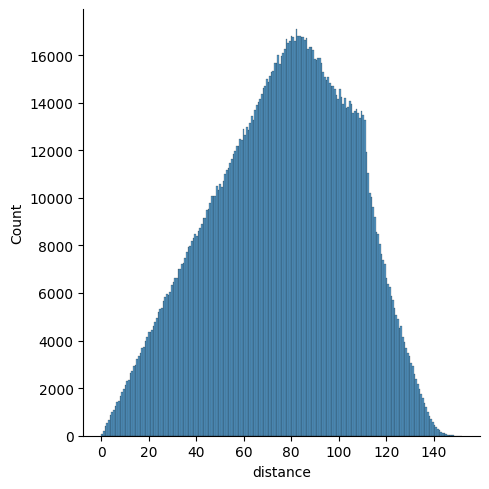

In [14]:
sns.displot(data=data['distance'])

Grouping the distance values

In [15]:
lst_distance = [(0,61), (61,111), (111,np.inf)]

distance_groups = pd.IntervalIndex.from_tuples(lst_distance, closed='left')

In [16]:
data['distance_groups'] = pd.cut(data['distance'], bins=distance_groups)

In [17]:
labels_distance = ['perto', 'proximo', 'longe']

data['distance_groups'] = data['distance_groups'].cat.rename_categories(labels_distance)

data['distance_groups'] = data['distance_groups'].astype('object')

In [18]:
data.loc[data['distance_groups'] == 'perto', 'distance_groups'] = 0
data.loc[data['distance_groups'] == 'proximo', 'distance_groups'] = 1
data.loc[data['distance_groups'] == 'longe', 'distance_groups'] = 2

data.distance_groups = data.distance_groups.astype('int64')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   merchant               object 
 2   category               object 
 3   amt                    float64
 4   first                  object 
 5   last                   object 
 6   gender                 object 
 7   street                 object 
 8   city                   object 
 9   state                  object 
 10  lat                    float64
 11  long                   float64
 12  city_pop               int64  
 13  job                    object 
 14  dob                    object 
 15  trans_num              object 
 16  merch_lat              float64
 17  merch_long             float64
 18  is_fraud               int64  
 19  distance               float64
 20  distance_groups        int64  
dtypes: float64(6), int64(3), object(12)
memory usage: 296.

In [20]:
# Removing columns that are no longer nedeed

data.drop(['lat', 'long', 'merch_lat', 'merch_long'], axis=1, inplace=True)

In [21]:
data.head(5)

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,city_pop,job,dob,trans_num,is_fraud,distance,distance_groups
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,0,78.773821,1
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,0,30.216618,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,0,108.102912,1
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,0,95.685115,1
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,0,77.702395,1


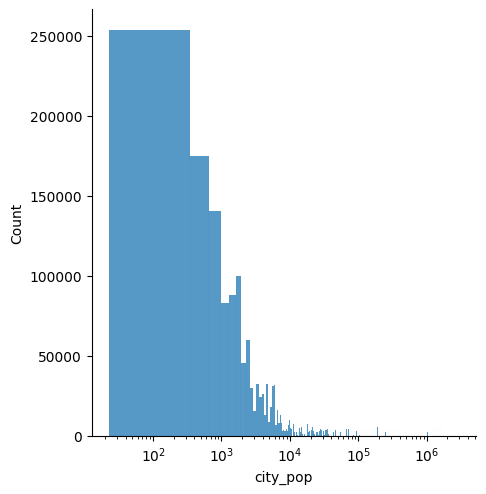

In [22]:
sns.displot(data=data['city_pop'])

plt.xscale('log')

In [23]:
data.city_pop.max()

np.int64(2906700)

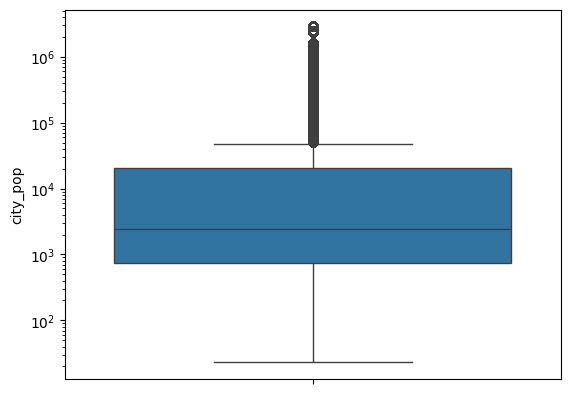

In [24]:
sns.boxplot(data=data['city_pop'])
plt.yscale('log')

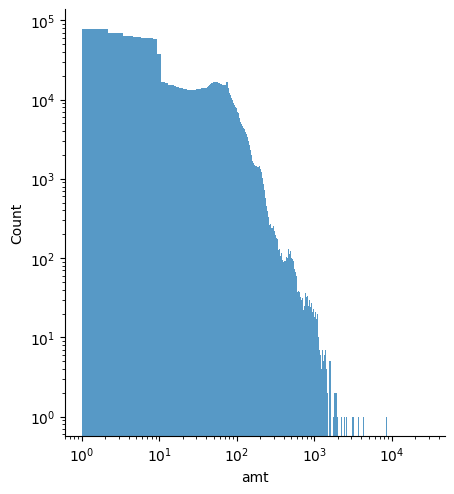

In [25]:
sns.displot(data=data['amt'])

plt.yscale('log')
plt.xscale('log')

plt.show()

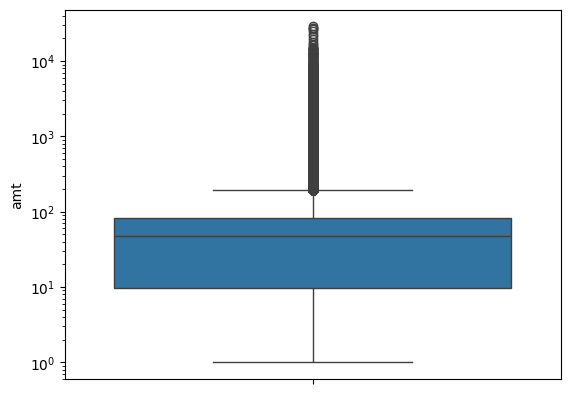

In [26]:
sns.boxplot(data=data['amt'])

plt.yscale('log')

In [27]:
data['amt'].max()

np.float64(28948.9)

## Variáveis Categóricas

In [28]:
categorical_columns = data.select_dtypes(['object'])
categorical_columns

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46
...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,fraud_Reilly and Sons,health_fitness,Michael,Olson,M,558 Michael Estates,Luray,MO,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada
1852390,2020-12-31 23:59:09,fraud_Hoppe-Parisian,kids_pets,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91
1852391,2020-12-31 23:59:15,fraud_Rau-Robel,kids_pets,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408
1852392,2020-12-31 23:59:24,fraud_Breitenberg LLC,travel,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa


In [29]:
# Removing unnecessary categorical columns

data.drop(['merchant', 'first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

In [30]:
#data.info()

**trans_date_trans_time:**

Análise mensal:

In [31]:
data.trans_date_trans_time = pd.to_datetime(data.trans_date_trans_time)

In [32]:
#data.trans_date_trans_time

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 11 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   state                  object        
 5   city_pop               int64         
 6   job                    object        
 7   dob                    object        
 8   is_fraud               int64         
 9   distance               float64       
 10  distance_groups        int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 155.5+ MB


In [34]:
num_trans = data.copy().iloc[:, [0, 8]]
num_trans

,trans_date_trans_time,is_fraud
0,2019-01-01 00:00:18,0
1,2019-01-01 00:00:44,0
2,2019-01-01 00:00:51,0
3,2019-01-01 00:01:16,0
4,2019-01-01 00:03:06,0
...,...,...
1852389,2020-12-31 23:59:07,0
1852390,2020-12-31 23:59:09,0
1852391,2020-12-31 23:59:15,0
1852392,2020-12-31 23:59:24,0


In [35]:
num_trans_month = num_trans.copy()

In [36]:
#num_trans.loc[:, 'trans_date_trans_time'] = num_trans.loc[:, 'trans_date_trans_time'].dt.month_name()

num_trans_month.loc[:, 'trans_date_trans_time'] = num_trans_month.loc[:, 'trans_date_trans_time'].dt.month_name()

/var/folders/47/3scnrlx95l70mkppsd9k32140000gn/T/ipykernel_60438/1966208411.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['January' 'January' 'January' ... 'December' 'December' 'December']' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  num_trans_month.loc[:, 'trans_date_trans_time'] = num_trans_month.loc[:, 'trans_date_trans_time'].dt.month_name()


In [37]:
num_trans_month = num_trans_month.value_counts().groupby(['trans_date_trans_time', 'is_fraud']).sum().sort_values(ascending=False).to_frame('num_transaction')

In [38]:
num_trans_month.index

MultiIndex([( 'December', 0),
            (   'August', 0),
            (     'June', 0),
            (     'July', 0),
            (      'May', 0),
            (    'March', 0),
            ( 'November', 0),
            ('September', 0),
            (  'October', 0),
            (    'April', 0),
            (  'January', 0),
            ( 'February', 0),
            (    'March', 1),
            (      'May', 1),
            ( 'February', 1),
            ( 'December', 1),
            (  'January', 1),
            (  'October', 1),
            (     'June', 1),
            (   'August', 1),
            ('September', 1),
            ( 'November', 1),
            (    'April', 1),
            (     'July', 1)],
           names=['trans_date_trans_time', 'is_fraud'])

In [39]:
num_trans_month.index.rename(['month', 'is_fraud'], inplace=True)
num_trans_month

,,num_transaction
month,is_fraud,
December,0,279748
August,0,175321
June,0,173048
July,0,171792
May,0,145940
March,0,142851
November,0,142374
September,0,139427
October,0,137268


In [40]:
num_trans_month.reset_index(inplace=True)

In [41]:
num_trans_month

,month,is_fraud,num_transaction
0,December,0,279748
1,August,0,175321
2,June,0,173048
3,July,0,171792
4,May,0,145940
5,March,0,142851
6,November,0,142374
7,September,0,139427
8,October,0,137268
9,April,0,134292


In [42]:
# Total de transações por mês

num_trans_month2 = num_trans_month.groupby('month').sum().sort_values(by='num_transaction', ascending=False)

In [43]:
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']

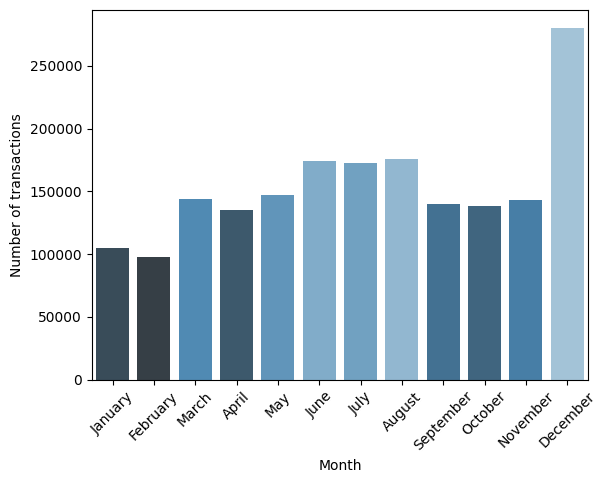

In [44]:
# Total de transações por mês

sns.barplot(
    data=num_trans_month2,
    x='month',
    y='num_transaction',
    palette="Blues_d",
    hue='month',
    legend=False,
    order=months_order,
    errorbar=None
)

plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of transactions')
plt.show()


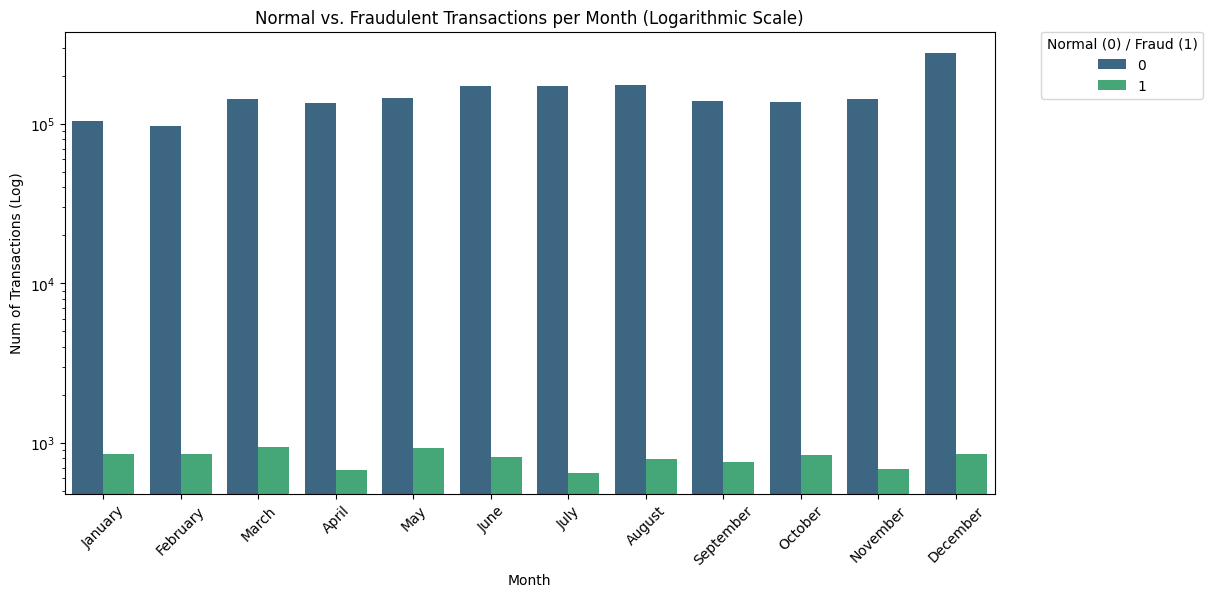

In [45]:
# Total de transações, fraudulentas e não fraudulentas, por mês

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=num_trans_month, 
    x='month', 
    y='num_transaction', 
    hue='is_fraud',      
    order=months_order,   
    palette="viridis"
)

# Usando escala logarítmica para conseguir enxergar os casos de fraudes
ax.set_yscale("log")

plt.title('Normal vs. Fraudulent Transactions per Month (Logarithmic Scale)')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Num of Transactions (Log)')
#plt.xticks(rotation=45)
plt.legend(title='Normal (0) / Fraud (1)',
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0)
#plt.tight_layout()

plt.show()


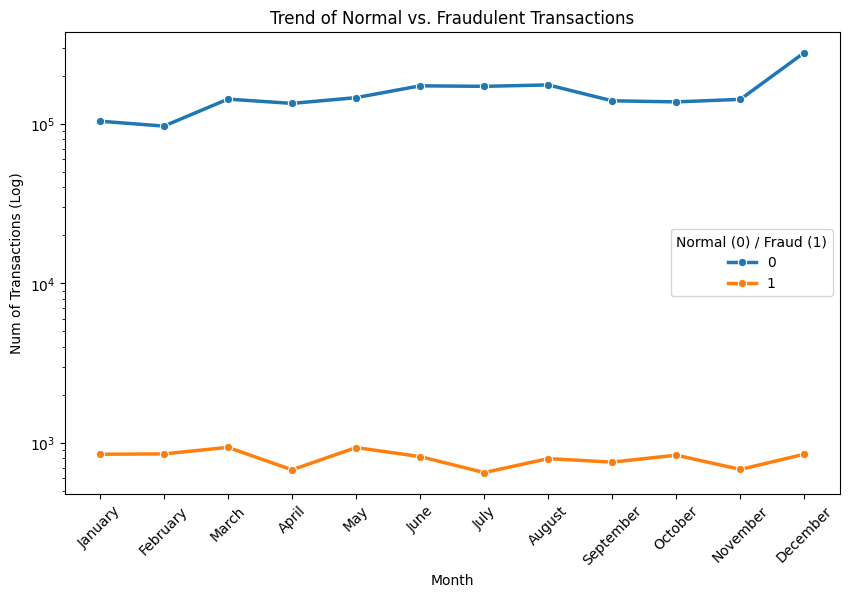

In [46]:
# Total de transações, fraudulentas e não fraudulentas, por hora --- Gráfico de linhas

num_trans_month['month'] = pd.Categorical(
    num_trans_month['month'], 
    categories=months_order, 
    ordered=True
)

num_trans_month.sort_values('month', inplace=True)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=num_trans_month, 
    x='month', 
    y='num_transaction', 
    hue='is_fraud', 
    marker='o',    
    linewidth=2.5
)

plt.yscale("log")

plt.title('Trend of Normal vs. Fraudulent Transactions')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Num of Transactions (Log)')
plt.legend(title='Normal (0) / Fraud (1)')

plt.show()


As operações fraudulentas se mantém de forma linear ao longo dos meses, tendo baixas mais evidentes nos meses de abril, julho e novembro, porém sem nenhum mês/época com um pico de ocorrências.

Isso indica que o mês do ano pode não ter grande influência para determinar se uma transação bancária é ou não uma fraude.

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 11 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   state                  object        
 5   city_pop               int64         
 6   job                    object        
 7   dob                    object        
 8   is_fraud               int64         
 9   distance               float64       
 10  distance_groups        int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 155.5+ MB


In [48]:
data['month'] = data['trans_date_trans_time'].dt.month_name()

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   state                  object        
 5   city_pop               int64         
 6   job                    object        
 7   dob                    object        
 8   is_fraud               int64         
 9   distance               float64       
 10  distance_groups        int64         
 11  month                  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 169.6+ MB


Análise semanal:

In [50]:
num_trans

,trans_date_trans_time,is_fraud
0,2019-01-01 00:00:18,0
1,2019-01-01 00:00:44,0
2,2019-01-01 00:00:51,0
3,2019-01-01 00:01:16,0
4,2019-01-01 00:03:06,0
...,...,...
1852389,2020-12-31 23:59:07,0
1852390,2020-12-31 23:59:09,0
1852391,2020-12-31 23:59:15,0
1852392,2020-12-31 23:59:24,0


In [51]:
num_trans_week = num_trans.copy()

In [52]:
num_trans_week.loc[:, 'trans_date_trans_time'] = num_trans_week.loc[:, 'trans_date_trans_time'].dt.day_name()

/var/folders/47/3scnrlx95l70mkppsd9k32140000gn/T/ipykernel_60438/3630903103.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Tuesday' 'Tuesday' 'Tuesday' ... 'Thursday' 'Thursday' 'Thursday']' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  num_trans_week.loc[:, 'trans_date_trans_time'] = num_trans_week.loc[:, 'trans_date_trans_time'].dt.day_name()


In [53]:
num_trans_week

,trans_date_trans_time,is_fraud
0,Tuesday,0
1,Tuesday,0
2,Tuesday,0
3,Tuesday,0
4,Tuesday,0
...,...,...
1852389,Thursday,0
1852390,Thursday,0
1852391,Thursday,0
1852392,Thursday,0


In [54]:
num_trans_week = num_trans_week.value_counts().groupby(['trans_date_trans_time', 'is_fraud']).sum().sort_values(ascending=False).to_frame('num_transactions')

In [55]:
num_trans_week.index

MultiIndex([(   'Monday', 0),
            (   'Sunday', 0),
            (  'Tuesday', 0),
            ( 'Saturday', 0),
            (   'Friday', 0),
            ( 'Thursday', 0),
            ('Wednesday', 0),
            (   'Sunday', 1),
            ( 'Saturday', 1),
            (   'Monday', 1),
            (   'Friday', 1),
            ( 'Thursday', 1),
            (  'Tuesday', 1),
            ('Wednesday', 1)],
           names=['trans_date_trans_time', 'is_fraud'])

In [56]:
num_trans_week

,,num_transactions
trans_date_trans_time,is_fraud,
Monday,0,367934
Sunday,0,342087
Tuesday,0,269074
Saturday,0,261734
Friday,0,213702
Thursday,0,205424
Wednesday,0,182788
Sunday,1,1590
Saturday,1,1493


In [57]:
num_trans_week.index.rename(['day_of_week', 'is_fraud'], inplace=True)

In [58]:
num_trans_week

,,num_transactions
day_of_week,is_fraud,
Monday,0,367934
Sunday,0,342087
Tuesday,0,269074
Saturday,0,261734
Friday,0,213702
Thursday,0,205424
Wednesday,0,182788
Sunday,1,1590
Saturday,1,1493


In [59]:
num_trans_week.reset_index(inplace=True)

In [60]:
num_trans_week

,day_of_week,is_fraud,num_transactions
0,Monday,0,367934
1,Sunday,0,342087
2,Tuesday,0,269074
3,Saturday,0,261734
4,Friday,0,213702
5,Thursday,0,205424
6,Wednesday,0,182788
7,Sunday,1,1590
8,Saturday,1,1493
9,Monday,1,1484


In [61]:
# Total de transações por semana

num_trans_week2 = num_trans_week.groupby('day_of_week').sum().sort_values(by='num_transactions', ascending=False)

In [62]:
num_trans_week2

,is_fraud,num_transactions
day_of_week,,
Monday,1,369418
Sunday,1,343677
Tuesday,1,270340
Saturday,1,263227
Friday,1,215078
Thursday,1,206741
Wednesday,1,183913


In [63]:
week_order = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday',
    'Friday', 'Saturday', 'Sunday'
]

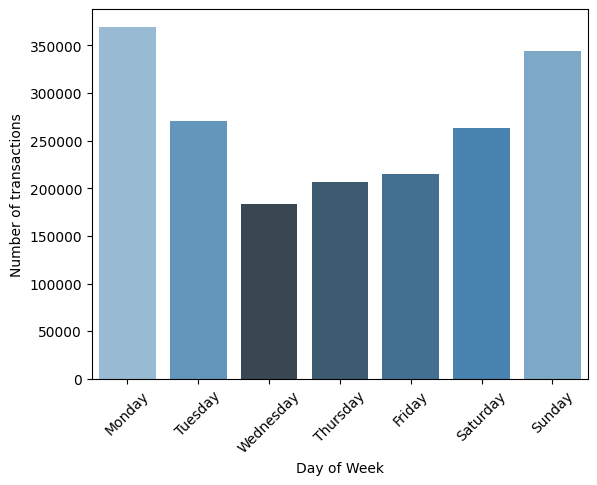

In [64]:
# Total de transações por dia da semana

sns.barplot(
    data=num_trans_week2,
    x='day_of_week',
    y='num_transactions',
    palette='Blues_d',
    hue='day_of_week',
    legend=False,
    order=week_order,
    errorbar=None
)

plt.xticks(rotation=45)
plt.xlabel('Day of Week')
plt.ylabel('Number of transactions')
plt.show()

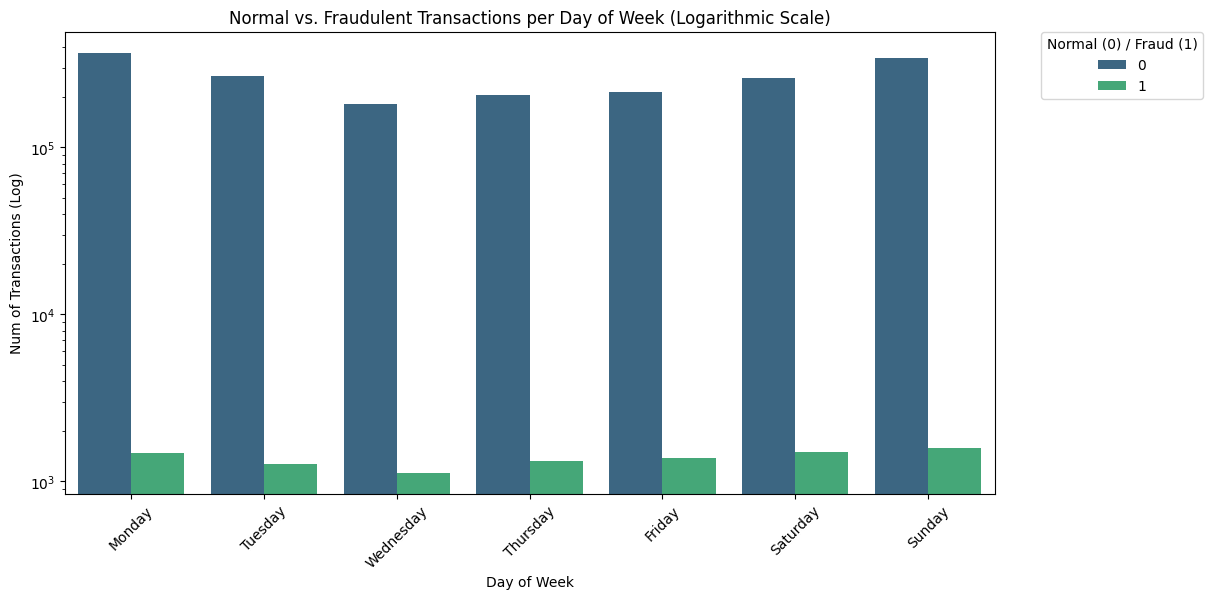

In [65]:
# Total de transações, fraudulentas e não fraudulentas, por dia da semana

plt.figure(figsize=(12,6))

sns.barplot(
    data=num_trans_week,
    x='day_of_week',
    y='num_transactions',
    hue='is_fraud',
    order=week_order,
    palette='viridis'
)

plt.yscale("log")

plt.title('Normal vs. Fraudulent Transactions per Day of Week (Logarithmic Scale)')
plt.xticks(rotation=45)
plt.xlabel('Day of Week')
plt.ylabel('Num of Transactions (Log)')
#plt.xticks(rotation=45)
plt.legend(title='Normal (0) / Fraud (1)',
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0)
#plt.tight_layout()

plt.show()

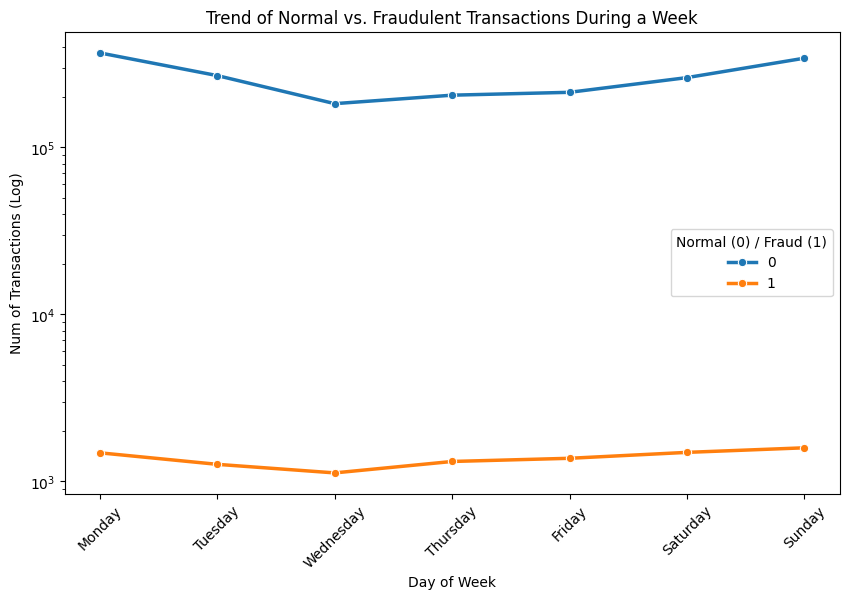

In [66]:
num_trans_week['day_of_week'] = pd.Categorical(
    num_trans_week['day_of_week'], 
    categories=week_order, 
    ordered=True
)

num_trans_week.sort_values('day_of_week', inplace=True)

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=num_trans_week, 
    x='day_of_week', 
    y='num_transactions', 
    hue='is_fraud', 
    marker='o',    
    linewidth=2.5
)

plt.yscale("log")

plt.title('Trend of Normal vs. Fraudulent Transactions During a Week')
plt.xticks(rotation=45)
plt.xlabel('Day of Week')
plt.ylabel('Num of Transactions (Log)')
plt.legend(title='Normal (0) / Fraud (1)')

plt.show()


As operações fraudulentas se mantém de forma linear ao longo da semana, não apresentando um pico evidente em algum dia da semana.

Isso indica que o dia da semana não tem grande influência para determinar se uma transação bancária é ou não uma fraude.

Análise por horário:

In [67]:
num_trans_hour = num_trans.copy()
num_trans_hour

,trans_date_trans_time,is_fraud
0,2019-01-01 00:00:18,0
1,2019-01-01 00:00:44,0
2,2019-01-01 00:00:51,0
3,2019-01-01 00:01:16,0
4,2019-01-01 00:03:06,0
...,...,...
1852389,2020-12-31 23:59:07,0
1852390,2020-12-31 23:59:09,0
1852391,2020-12-31 23:59:15,0
1852392,2020-12-31 23:59:24,0


In [68]:
num_trans_hour.loc[:, 'trans_date_trans_time'] = num_trans_hour.loc[:, 'trans_date_trans_time'].dt.hour

/var/folders/47/3scnrlx95l70mkppsd9k32140000gn/T/ipykernel_60438/1367698265.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0  0  0 ... 23 23 23]' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  num_trans_hour.loc[:, 'trans_date_trans_time'] = num_trans_hour.loc[:, 'trans_date_trans_time'].dt.hour


In [69]:
num_trans_hour

,trans_date_trans_time,is_fraud
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1852389,23,0
1852390,23,0
1852391,23,0
1852392,23,0


In [70]:
num_trans_hour = num_trans_hour.value_counts().groupby(['trans_date_trans_time', 'is_fraud']).sum().sort_values(ascending=False).to_frame('num_transactions')

In [71]:
num_trans_hour.index.rename(['hour', 'is_fraud'], inplace=True)
num_trans_hour

,,num_transactions
hour,is_fraud,
16,0,94192
18,0,93941
21,0,93637
23,0,93460
17,0,93420
13,0,93398
15,0,93339
19,0,93328
12,0,93210


In [72]:
num_trans_hour.reset_index(inplace=True)

In [73]:
#um_trans_hour

In [74]:
# Total de transações por hora

num_trans_hour2 = num_trans_hour.groupby('hour').sum().sort_values(by='num_transactions', ascending=False)

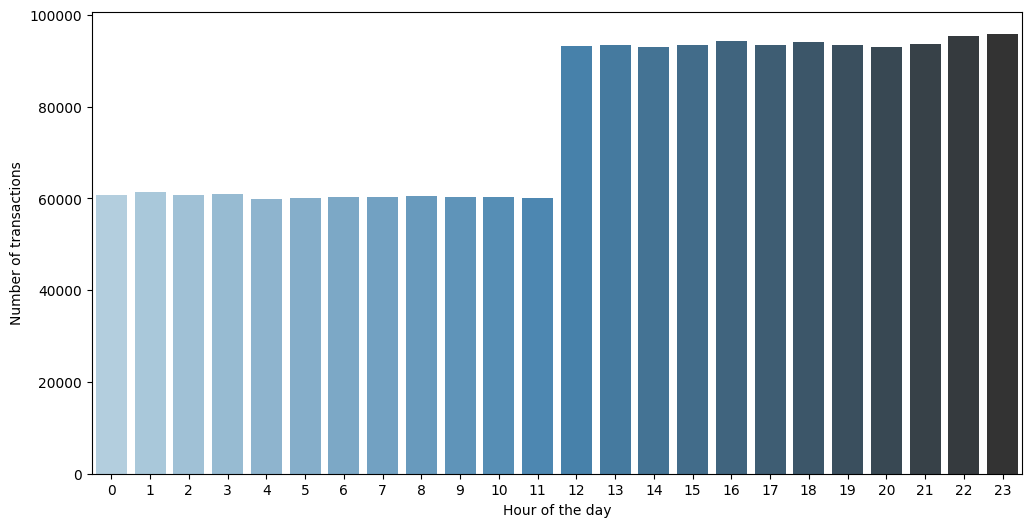

In [75]:
# Total de transações por hora

plt.figure(figsize=(12,6))

sns.barplot(
    data=num_trans_hour2,
    x='hour',
    y='num_transactions',
    palette="Blues_d",
    hue='hour',
    legend=False,
    errorbar=None
)

plt.xlabel('Hour of the day')
plt.ylabel('Number of transactions')
plt.show()


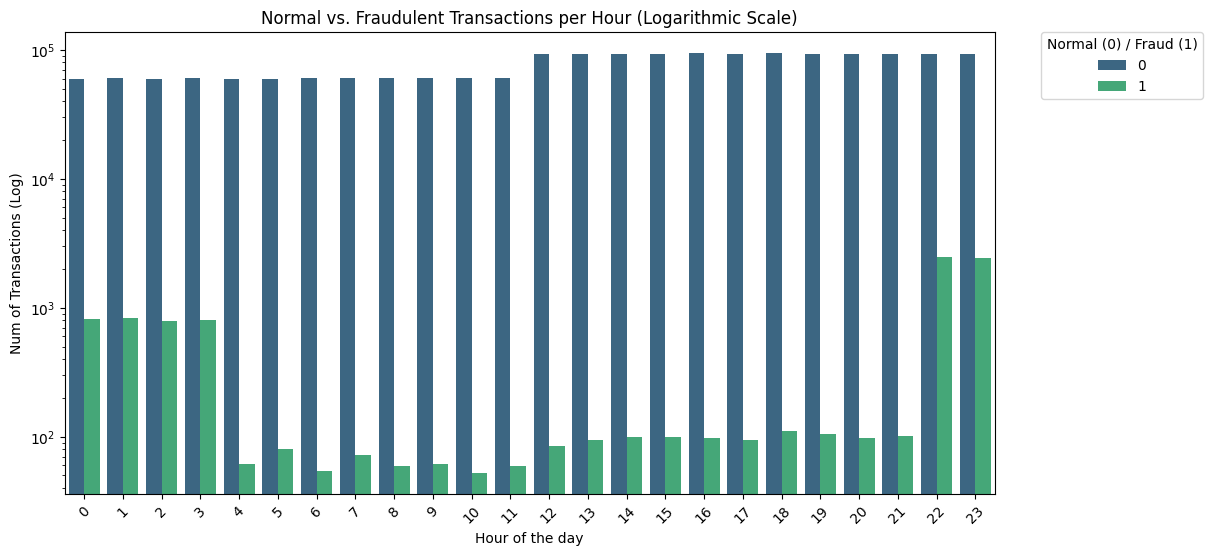

In [76]:
# Total de transações, fraudulentas e não fraudulentas, por hora

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=num_trans_hour, 
    x='hour', 
    y='num_transactions', 
    hue='is_fraud',  
    palette="viridis"
)

# Usando escala logarítmica para conseguir enxergar os casos de fraudes
ax.set_yscale("log")

plt.title('Normal vs. Fraudulent Transactions per Hour (Logarithmic Scale)')
plt.xticks(rotation=45)
plt.xlabel('Hour of the day')
plt.ylabel('Num of Transactions (Log)')
#plt.xticks(rotation=45)
plt.legend(title='Normal (0) / Fraud (1)',
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0)
#plt.tight_layout()

plt.show()


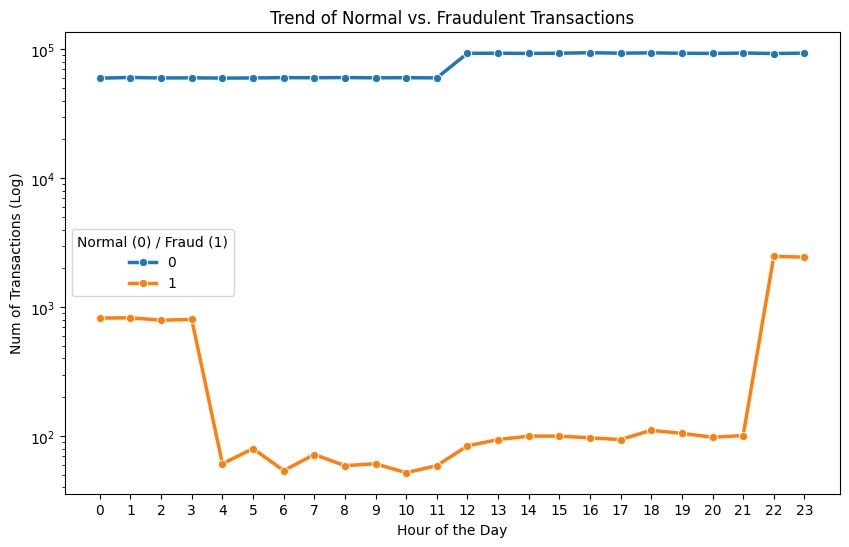

In [77]:
# Total de transações, fraudulentas e não fraudulentas, por hora --- Gráfico de linhas

num_trans_hour['hour'] = pd.Categorical(
    num_trans_hour['hour'], 
    ordered=True
)

num_trans_hour.sort_values('hour', inplace=True)

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=num_trans_hour, 
    x='hour', 
    y='num_transactions', 
    hue='is_fraud', 
    marker='o',    
    linewidth=2.5
)

plt.yscale("log")

plt.title('Trend of Normal vs. Fraudulent Transactions')
#plt.xticks(rotation=45)
plt.xticks(range(len(num_trans_hour['hour'].unique())))
plt.xlabel('Hour of the Day')
plt.ylabel('Num of Transactions (Log)')
plt.legend(title='Normal (0) / Fraud (1)')

plt.show()


As operações fraudulentas apresentam um aumento a partir de 12h.

Têm maior ocorrência no intervalo de 22h até 3h, com seu pico às 22h/23h. 

In [78]:
data['hour'] = data['trans_date_trans_time'].dt.hour.astype('int64')

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   state                  object        
 5   city_pop               int64         
 6   job                    object        
 7   dob                    object        
 8   is_fraud               int64         
 9   distance               float64       
 10  distance_groups        int64         
 11  month                  object        
 12  hour                   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 183.7+ MB


**category:**

In [80]:
data.category.value_counts()

category
gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: count, dtype: int64

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   state                  object        
 5   city_pop               int64         
 6   job                    object        
 7   dob                    object        
 8   is_fraud               int64         
 9   distance               float64       
 10  distance_groups        int64         
 11  month                  object        
 12  hour                   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 183.7+ MB


In [82]:
fraud_by_category = data.copy().iloc[:, [1, 8]]
fraud_by_category

,category,is_fraud
0,misc_net,0
1,grocery_pos,0
2,entertainment,0
3,gas_transport,0
4,misc_pos,0
...,...,...
1852389,health_fitness,0
1852390,kids_pets,0
1852391,kids_pets,0
1852392,travel,0


In [83]:
fraud_by_category.value_counts()

category        is_fraud
gas_transport   0           187257
home            0           175195
grocery_pos     0           173963
shopping_pos    0           165407
kids_pets       0           161423
shopping_net    0           137103
entertainment   0           133826
food_dining     0           130524
personal_care   0           129795
health_fitness  0           122368
misc_pos        0           113907
misc_net        0            89472
grocery_net     0            64703
travel          0            57800
grocery_pos     1             2228
shopping_net    1             2219
misc_net        1             1182
shopping_pos    1             1056
gas_transport   1              772
misc_pos        1              322
kids_pets       1              304
entertainment   1              292
personal_care   1              290
home            1              265
food_dining     1              205
health_fitness  1              185
grocery_net     1              175
travel          1             

In [84]:
fraud_by_category = fraud_by_category.value_counts().groupby(['category', 'is_fraud']).sum().to_frame()

In [85]:
fraud_by_category.reset_index(inplace=True)

In [86]:
fraud_by_category

,category,is_fraud,count
0,entertainment,0,133826
1,entertainment,1,292
2,food_dining,0,130524
3,food_dining,1,205
4,gas_transport,0,187257
5,gas_transport,1,772
6,grocery_net,0,64703
7,grocery_net,1,175
8,grocery_pos,0,173963
9,grocery_pos,1,2228


In [87]:
# Categorias com maior índice de operações fraudulentas

fraud_by_category[fraud_by_category.is_fraud==1].sort_values(by="count", ascending=False).head(10)

,category,is_fraud,count
9,grocery_pos,1,2228
23,shopping_net,1,2219
17,misc_net,1,1182
25,shopping_pos,1,1056
5,gas_transport,1,772
19,misc_pos,1,322
15,kids_pets,1,304
1,entertainment,1,292
21,personal_care,1,290
13,home,1,265


In [88]:
# Total de transações por categoria

fraud_by_category.sort_values(by="count", ascending=False).head(15)

,category,is_fraud,count
4,gas_transport,0,187257
12,home,0,175195
8,grocery_pos,0,173963
24,shopping_pos,0,165407
14,kids_pets,0,161423
22,shopping_net,0,137103
0,entertainment,0,133826
2,food_dining,0,130524
20,personal_care,0,129795
10,health_fitness,0,122368


Apenas 2/10 categorias com maiores índices de fraude não aparecem dentre os top10 de transações por categoria.

Essas duas categorias são: *misc_net* e *misc_pos*

Ou seja, são categorias que não costumam ter tantas transações bancárias, porém são top10 de fraude.

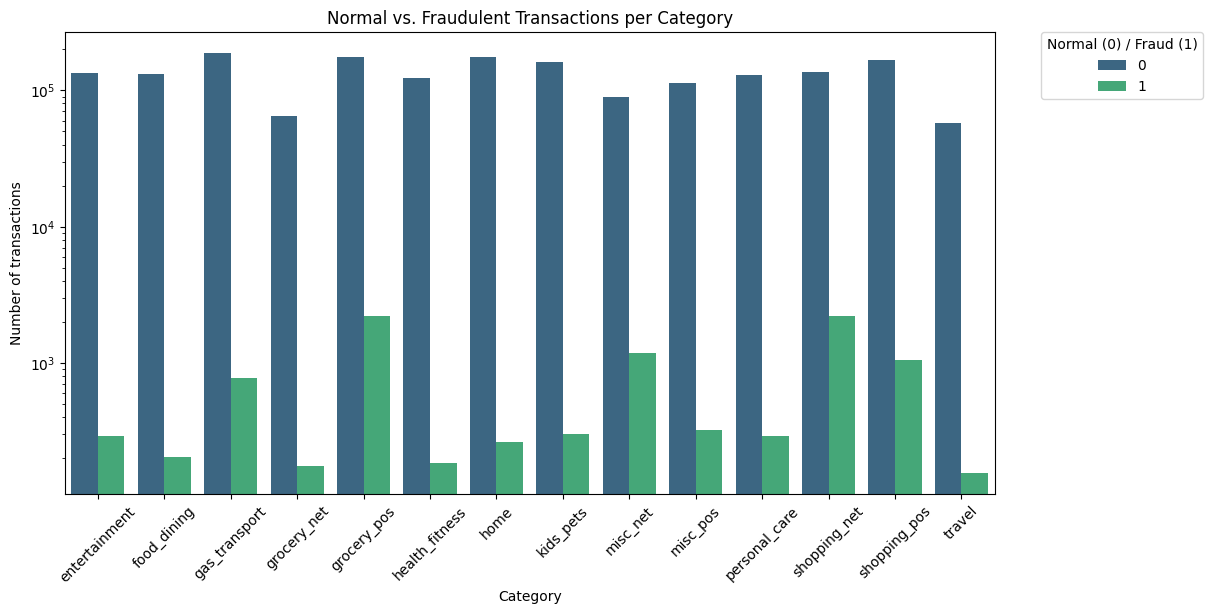

In [89]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=fraud_by_category, 
    x='category', 
    y='count', 
    palette="viridis", 
    hue='is_fraud', 
)

plt.yscale("log")

plt.title('Normal vs. Fraudulent Transactions per Category')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Number of transactions')
plt.legend(title='Normal (0) / Fraud (1)', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left', 
           borderaxespad=0)
plt.show()

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   state                  object        
 5   city_pop               int64         
 6   job                    object        
 7   dob                    object        
 8   is_fraud               int64         
 9   distance               float64       
 10  distance_groups        int64         
 11  month                  object        
 12  hour                   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 183.7+ MB


**gender**

In [91]:
data.groupby(['is_fraud', 'gender'])['is_fraud'].count()

is_fraud  gender
0         F         1009850
          M          832893
1         F            4899
          M            4752
Name: is_fraud, dtype: int64

Com relação às transações fraudulentas, não há uma distinção de gênero. Os valores são bem parecidos, mostrando que não parece haver uma relação entre gênero e ocorrência de fraude.

**state**

In [92]:
data.state.value_counts()

state
TX    135269
NY    119419
PA    114173
CA     80495
OH     66627
MI     65825
IL     62212
FL     60775
AL     58521
MO     54904
MN     45433
AR     44611
NC     43134
VA     41756
WI     41738
SC     41731
KY     40981
IN     39539
IA     38804
OK     38050
MD     37345
GA     37340
WV     36529
NJ     35131
NE     34425
KS     32939
MS     30021
LA     29953
WY     27776
WA     27040
OR     26408
TN     24913
ME     23433
NM     23427
ND     21183
CO     19766
SD     17574
MA     17562
VT     16812
MT     16806
AZ     15362
UT     15357
NH     11727
CT     10979
NV      8058
ID      8035
DC      5130
HI      3649
AK      2963
RI       745
DE         9
Name: count, dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [94]:
regions = {
    "Northeast": ["CT", "ME", "MA", "NH", "RI", "VT", "NJ", "NY", "PA"],
    "Midwest": ["IL", "IN", "IA", "KS", "MI", "MN", "MO", "NE", "ND", "OH", "SD", "WI"],
    "South": ["AL", "AR", "DE", "FL", "GA", "KY", "LA", "MD", "MS", "NC", "OK", "SC", "TN", "TX", "VA", "WV", "DC"],
    "West": ["AK", "AZ", "CA", "CO", "HI", "ID", "MT", "NV", "NM", "OR", "UT", "WA", "WY"]
}

In [95]:
def get_region(state):
    
    for region, states in regions.items():
        if state in states:
            return region

In [96]:
data['region'] = data['state'].apply(
    lambda state: get_region(state)
)

In [97]:
data.region.value_counts()

region
South        706068
Midwest      521203
Northeast    349981
West         275142
Name: count, dtype: int64

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   state                  object        
 5   city_pop               int64         
 6   job                    object        
 7   dob                    object        
 8   is_fraud               int64         
 9   distance               float64       
 10  distance_groups        int64         
 11  month                  object        
 12  hour                   int64         
 13  region                 object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 197.9+ MB


In [99]:
fraud_by_region = data.groupby(['is_fraud', 'region'])['is_fraud'].count().sort_values(ascending=False).to_frame("count")

In [100]:
fraud_by_region.reset_index(inplace=True)

In [101]:
#fraud_by_region

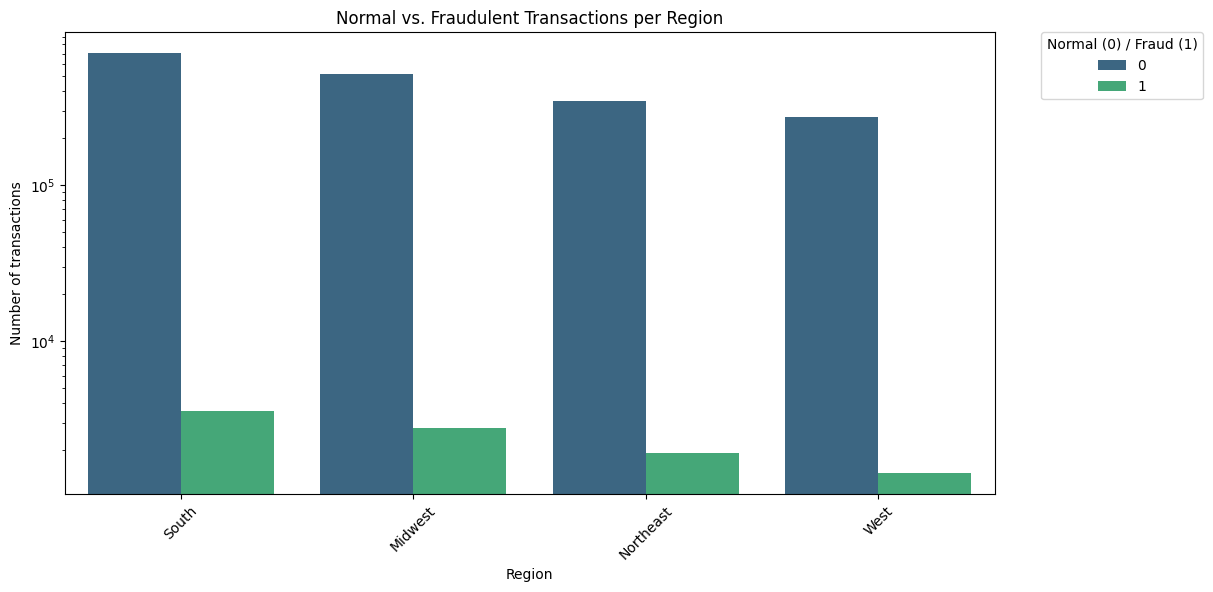

In [102]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=fraud_by_region,
    x='region', 
    y='count', 
    palette="viridis", 
    hue='is_fraud', 
)

plt.yscale("log")

plt.title('Normal vs. Fraudulent Transactions per Region')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Number of transactions')
plt.legend(title='Normal (0) / Fraud (1)', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left', 
           borderaxespad=0)
plt.show()

**job**

In [103]:
data.job.value_counts()

job
Film/video editor             13898
Exhibition designer           13167
Surveyor, land/geomatics      12436
Naval architect               12434
Materials engineer            11711
                              ...  
Veterinary surgeon                8
Engineer, water                   8
Contracting civil engineer        7
Ship broker                       7
Warehouse manager                 7
Name: count, Length: 497, dtype: int64

In [104]:
fraud_by_job = data.groupby(['is_fraud', 'job'])['is_fraud'].count().sort_values(ascending=False).to_frame("count")

In [105]:
data[(data['job'] == 'Film/video editor') & (data['is_fraud']==1)]

,trans_date_trans_time,category,amt,gender,state,city_pop,job,dob,is_fraud,distance,distance_groups,month,hour,region
54010,2019-02-02 00:16:40,misc_pos,834.58,F,ND,77,Film/video editor,1989-12-17,1,15.739985,0,February,0,Midwest
54092,2019-02-02 01:57:55,misc_net,831.58,F,ND,77,Film/video editor,1989-12-17,1,110.508981,1,February,1,Midwest
54169,2019-02-02 03:26:08,shopping_pos,1025.62,F,ND,77,Film/video editor,1989-12-17,1,55.529571,0,February,3,Midwest
55417,2019-02-02 23:12:40,shopping_pos,831.73,F,ND,77,Film/video editor,1989-12-17,1,48.746607,0,February,23,Midwest
55483,2019-02-02 23:57:27,health_fitness,20.13,F,ND,77,Film/video editor,1989-12-17,1,104.575046,1,February,23,Midwest
55491,2019-02-03 00:06:42,shopping_net,1103.76,F,ND,77,Film/video editor,1989-12-17,1,41.881112,0,February,0,Midwest
55616,2019-02-03 01:46:40,shopping_pos,922.10,F,ND,77,Film/video editor,1989-12-17,1,121.323343,2,February,1,Midwest
55676,2019-02-03 02:38:03,shopping_net,969.63,F,ND,77,Film/video editor,1989-12-17,1,74.098900,1,February,2,Midwest
55678,2019-02-03 02:38:46,shopping_pos,1034.80,F,ND,77,Film/video editor,1989-12-17,1,105.820237,1,February,2,Midwest
55752,2019-02-03 03:50:02,shopping_pos,905.96,F,ND,77,Film/video editor,1989-12-17,1,121.022671,2,February,3,Midwest


In [106]:
fraud_by_job

count
is_fraud job                               
0        Film/video editor            13846
         Exhibition designer          13116
         Surveyor, land/geomatics     12386
         Naval architect              12368
         Designer, ceramics/pottery   11665
...                                     ...
1        Corporate investment banker      4
         Professor Emeritus               4
         Health physicist                 3
         Statistician                     3
         Contractor                       2

[969 rows x 1 columns]

In [107]:
fraud_by_job.reset_index(inplace=True)

In [108]:
fraud_by_job_1 = fraud_by_job[fraud_by_job.is_fraud==1].head(10)
fraud_by_job_1

,is_fraud,job,count
475,1,Quantity surveyor,69
476,1,Naval architect,66
477,1,Materials engineer,62
478,1,Audiological scientist,58
479,1,Senior tax professional/tax inspector,57
480,1,Trading standards officer,56
481,1,Podiatrist,54
482,1,Film/video editor,52
483,1,Exhibition designer,51
484,1,Colour technologist,51


In [109]:
fraud_by_job_0 = fraud_by_job[fraud_by_job.is_fraud==0].head(10)
fraud_by_job_0

,is_fraud,job,count
0,0,Film/video editor,13846
1,0,Exhibition designer,13116
2,0,"Surveyor, land/geomatics",12386
3,0,Naval architect,12368
4,0,"Designer, ceramics/pottery",11665
5,0,Materials engineer,11649
6,0,Environmental consultant,10937
7,0,Financial adviser,10921
8,0,Systems developer,10920
9,0,IT trainer,10906


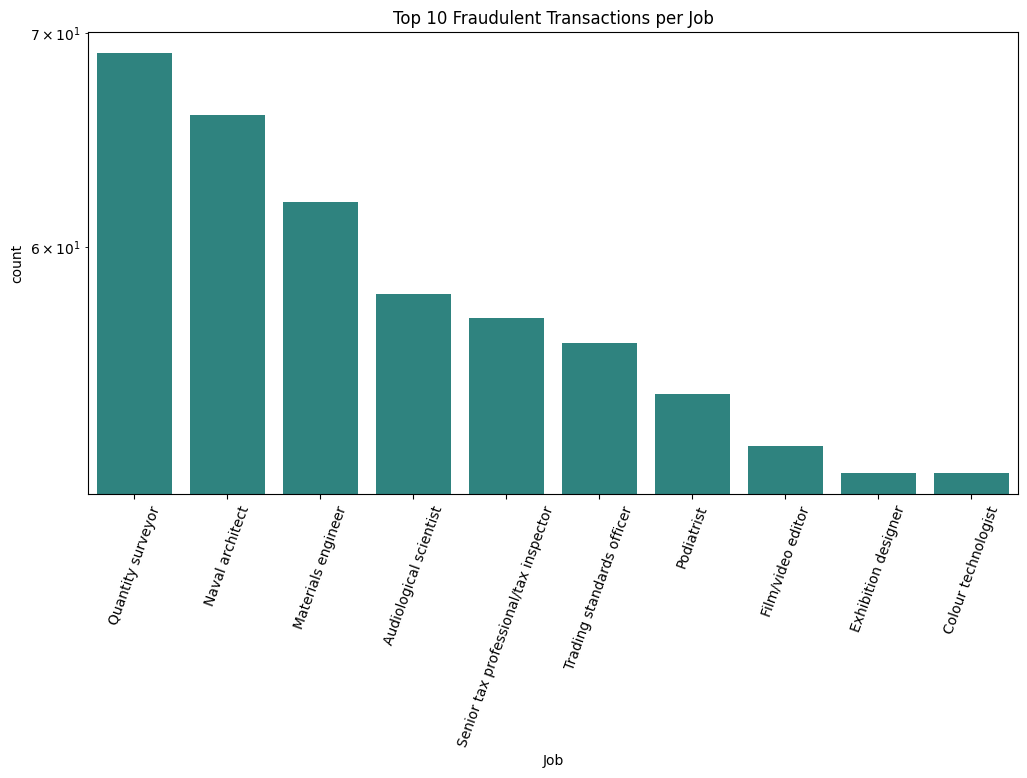

In [110]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=fraud_by_job_1, 
    x='job', 
    y='count', 
    palette="viridis", 
    hue='is_fraud',
    legend=False
)

plt.yscale("log")

plt.title('Top 10 Fraudulent Transactions per Job')
plt.xticks(rotation=70)
plt.xlabel('Job')
plt.show()

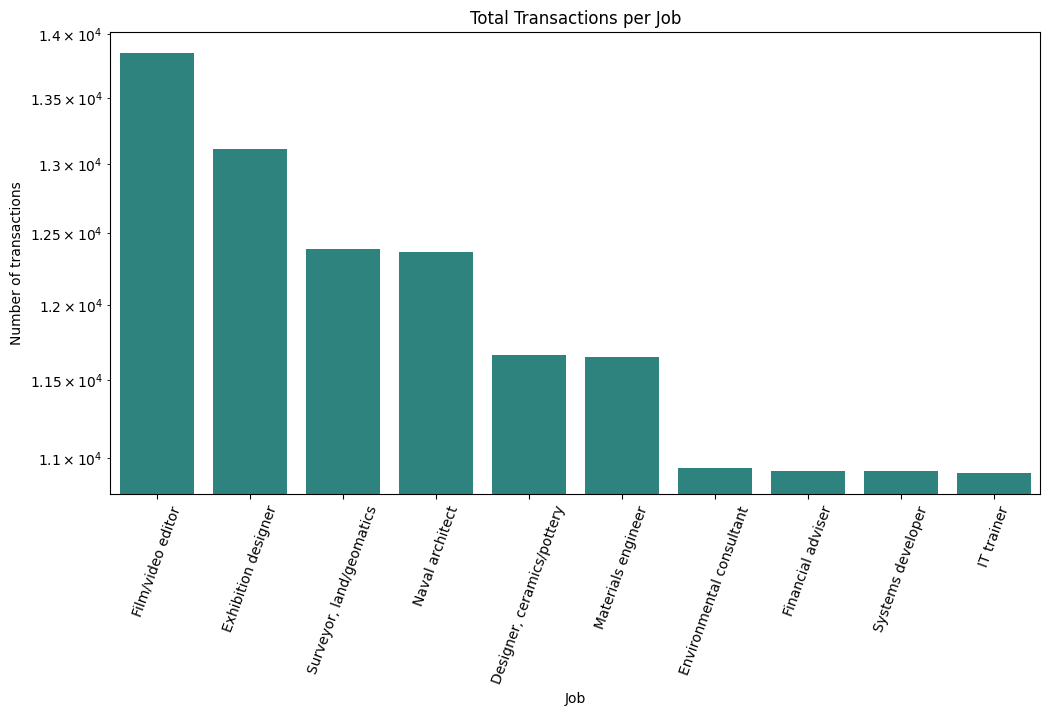

In [111]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=fraud_by_job_0, 
    x='job', 
    y='count', 
    palette="viridis", 
    hue='is_fraud', 
    legend=False
)

plt.yscale("log")

plt.title('Total Transactions per Job')
plt.xticks(rotation=70)
plt.xlabel('Job')
plt.ylabel('Number of transactions')
plt.show()

O que parece acontecer é que as transações fraudulentas não se concentram em trabalhos que realizam maior número de transações. 

Pelo contrário: os trabalhos associados a maior quantidade de operações fraudulentas são trabalhos que não realizam muitas transações de forma geral.

**dob**

In [112]:
data.dob = pd.to_datetime(data.dob)

In [113]:
def calculate_age(dob):
    
    '''
    Calcute the age by the date of birth
    
    :param dob: date of birth, YYYY-MM-DD
    '''

    today = date.today()

    age = today.year - dob.year

    if (today.month, today.day) < (dob.month, dob.day):
        age -= 1


    return age

In [114]:
data['age'] = data['dob'].apply(lambda x: calculate_age(x))

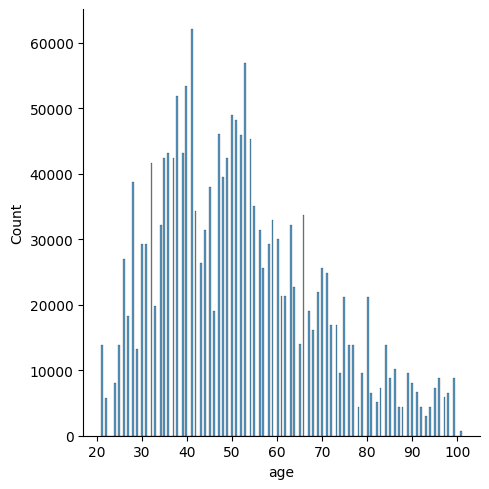

In [115]:
sns.displot(data.age)

<Axes: ylabel='age'>

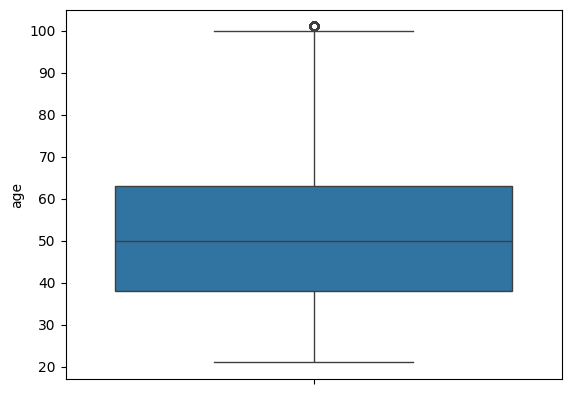

In [116]:
sns.boxplot(data.age)

<Axes: xlabel='is_fraud', ylabel='age'>

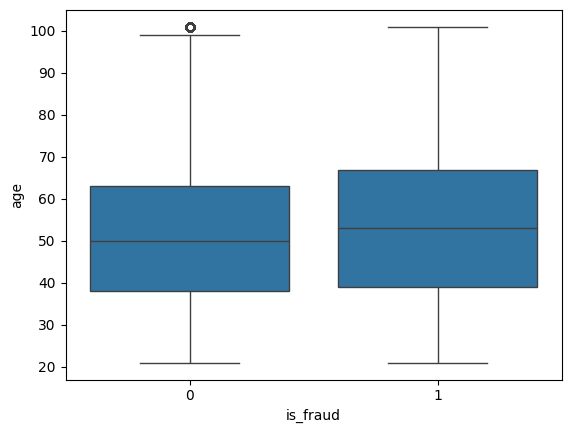

In [117]:
sns.boxplot(data=data, x='is_fraud', y='age')

In [118]:
# Categorizando as idades em faixas etárias

lst_age = [(20, 30), (30, 60), (60, np.inf)]

age_groups = pd.IntervalIndex.from_tuples(lst_age, closed='left')

In [119]:
data['age_groups'] = pd.cut(data['age'], bins=age_groups)

In [120]:
labels = ['jovem', 'adulto', 'idoso']

data['age_groups'] = data['age_groups'].cat.rename_categories(labels)

In [121]:
(data['is_fraud'] == 1).sum()

np.int64(9651)

In [122]:
(data['is_fraud'] == 0).sum()

np.int64(1842743)

In [123]:
fraud_by_age = data.groupby('age_groups', observed=False)['is_fraud'].value_counts().to_frame("count")
fraud_by_age

count
age_groups is_fraud         
jovem      0          138335
           1             751
adulto     0         1162730
           1            5245
idoso      0          541678
           1            3655

In [124]:
fraud_by_age.reset_index(inplace=True)

In [125]:
#fraud_by_age

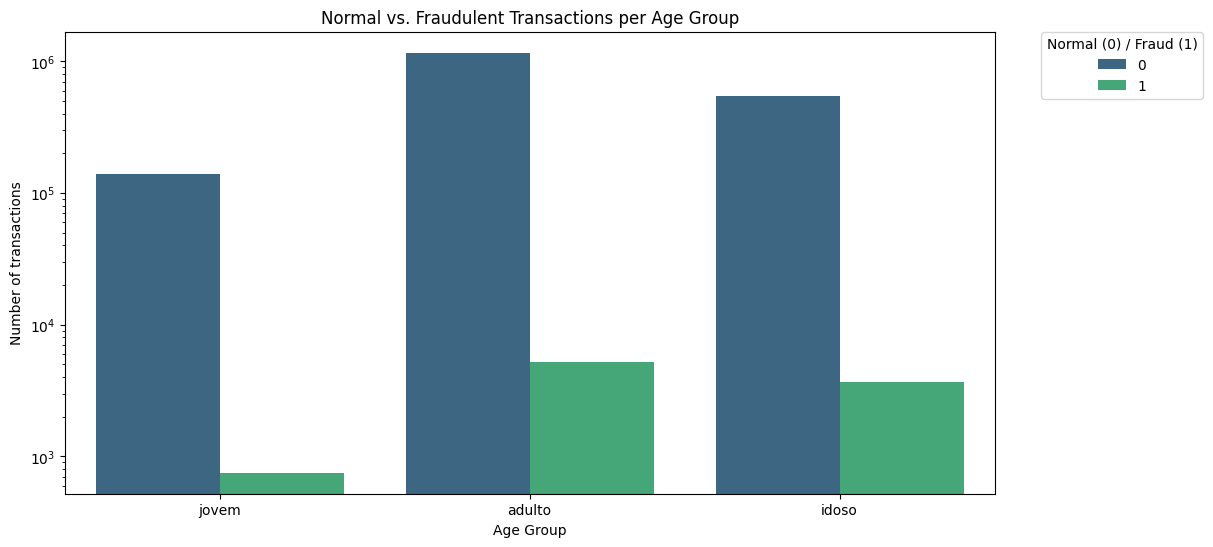

In [126]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=fraud_by_age,
    x='age_groups', 
    y='count', 
    palette="viridis", 
    hue='is_fraud', 
)

plt.yscale("log")

plt.title('Normal vs. Fraudulent Transactions per Age Group')
#plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Number of transactions')
plt.legend(title='Normal (0) / Fraud (1)', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left', 
           borderaxespad=0)
plt.show()

Percebe-se que os adultos (faixa etária de 30 a 60 anos) são os que mais realizam transações bancárias, e são também os maiores alvos de fraudes bancárias.

In [127]:
data['age_groups'] = data['age_groups'].astype('object')

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   state                  object        
 5   city_pop               int64         
 6   job                    object        
 7   dob                    datetime64[ns]
 8   is_fraud               int64         
 9   distance               float64       
 10  distance_groups        int64         
 11  month                  object        
 12  hour                   int64         
 13  region                 object        
 14  age                    int64         
 15  age_groups             object        
dtypes: datetime64[ns](2), float64(2), int64(5), object(7)
memory usage: 226.1+ MB


In [129]:
# Removing columns that are no longer nedeed

data.drop(['trans_date_trans_time', 'gender', 'state', 'dob'], axis=1, inplace=True)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   category         object 
 1   amt              float64
 2   city_pop         int64  
 3   job              object 
 4   is_fraud         int64  
 5   distance         float64
 6   distance_groups  int64  
 7   month            object 
 8   hour             int64  
 9   region           object 
 10  age              int64  
 11  age_groups       object 
dtypes: float64(2), int64(5), object(5)
memory usage: 169.6+ MB


In [131]:
data['hour'] = data['hour'].astype('object')

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   category         object 
 1   amt              float64
 2   city_pop         int64  
 3   job              object 
 4   is_fraud         int64  
 5   distance         float64
 6   distance_groups  int64  
 7   month            object 
 8   hour             object 
 9   region           object 
 10  age              int64  
 11  age_groups       object 
dtypes: float64(2), int64(4), object(6)
memory usage: 169.6+ MB


In [133]:
# Get dummies das variáveis categóricas

cat_cols = list(data.select_dtypes(['object']).columns)
data = pd.get_dummies(
    data=data,
    columns=cat_cols,
    prefix=cat_cols,
    drop_first=True
)

In [134]:
data.head(10)

,amt,city_pop,is_fraud,distance,distance_groups,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,...,hour_19,hour_20,hour_21,hour_22,hour_23,region_Northeast,region_South,region_West,age_groups_idoso,age_groups_jovem
0,4.97,3495,0,78.773821,1,37,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,107.23,149,0,30.216618,0,47,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,220.11,4154,0,108.102912,1,64,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
3,45.00,1939,0,95.685115,1,59,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,41.96,99,0,77.702395,1,39,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,94.63,2158,0,86.097358,1,64,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
6,44.54,2691,0,118.094855,2,32,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,71.65,6018,0,12.754714,0,78,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
8,4.27,1472,0,25.333883,0,84,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
9,198.39,151785,0,73.939714,1,51,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


## Modelos de Machine Learning

### Modelo de Regressão Logística

Com as variáveis *distance_groups* e *age_groups*:

In [135]:
X_lr_1 = data.drop(['is_fraud', 'distance', 'age'], axis=1)

y_lr_1 = data['is_fraud']

In [136]:
# Separando o conjunto em conjunto de treino, validação e teste

X_temp_lr_1, X_test_lr_1, y_temp_lr_1, y_test_lr_1 = train_test_split(
    X_lr_1, y_lr_1, test_size=0.2, random_state=42
)

X_train_lr_1, X_val_lr_1, y_train_lr_1, y_val_lr_1 = train_test_split(
    X_temp_lr_1, y_temp_lr_1, test_size=0.25, random_state=42
)

In [137]:
logreg_1 = LogisticRegression(random_state=42)

In [138]:
logreg_1.fit(X_train_lr_1, y_train_lr_1)

y_pred_lr_1 = logreg_1.predict(X_test_lr_1)

/Users/thalita/Documents/Credit Card Fraud Detection/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/thalita/Documents/Credit Card Fraud Detection/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/thalita/Documents/Credit Card Fraud Detection/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/thalita/Documents/Credit Card Fraud Detection/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/thalita/Documents/Credit Card Fraud Detection/.venv/lib/python3.9/site-p

In [139]:
acc_lr_1 = accuracy_score(y_val_lr_1, y_pred_lr_1)
class_rep_lr_1 = classification_report(y_val_lr_1, y_pred_lr_1)

print(f"Accucary: {acc_lr_1:.2f}")
print("\nClassification Report:\n", class_rep_lr_1)

Accucary: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    368523
           1       0.00      0.00      0.00      1956

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479



In [140]:
cnf_matrix = metrics.confusion_matrix(y_val_lr_1, y_pred_lr_1)
cnf_matrix


array([[368359,    164],
       [  1956,      0]])

Com as variáveis *distance* e *age*:

In [141]:
X_lr_2 = data.drop(['is_fraud', 'distance_groups', 'age_groups_idoso', 'age_groups_jovem'], axis=1)

y_lr_2 = data['is_fraud']

In [142]:
# Separando o conjunto em conjunto de treino, validação e teste

X_temp_lr_2, X_test_lr_2, y_temp_lr_2, y_test_lr_2 = train_test_split(
    X_lr_2, y_lr_2, test_size=0.2, random_state=42
)

X_train_lr_2, X_val_lr_2, y_train_lr_2, y_val_lr_2 = train_test_split(
    X_temp_lr_2, y_temp_lr_2, test_size=0.25, random_state=42
)

In [143]:
logreg_2 = LogisticRegression(random_state=42)

In [144]:
logreg_2.fit(X_train_lr_2, y_train_lr_2)

y_pred_lr_2 = logreg_2.predict(X_test_lr_2)

/Users/thalita/Documents/Credit Card Fraud Detection/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/thalita/Documents/Credit Card Fraud Detection/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/thalita/Documents/Credit Card Fraud Detection/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/thalita/Documents/Credit Card Fraud Detection/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/thalita/Documents/Credit Card Fraud Detection/.venv/lib/python3.9/site-p

In [145]:
acc_lr_2 = accuracy_score(y_val_lr_2, y_pred_lr_2)
class_rep_lr_2 = classification_report(y_val_lr_2, y_pred_lr_2)

print(f"Accucary: {acc_lr_2:.2f}")
print("\nClassification Report:\n", class_rep_lr_2)

Accucary: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    368523
           1       0.01      0.00      0.00      1956

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479



In [146]:
cnf_matrix_2 = metrics.confusion_matrix(y_val_lr_2, y_pred_lr_2)
cnf_matrix_2


array([[368364,    159],
       [  1954,      2]])

De modo geral, o modelo de Regressão Logística não apresentou bom desempenho.

### Modelo de Random Forest

Com as variáveis *distance_groups* e *age_groups*:

In [147]:
X_rf_1 = data.drop(['is_fraud', 'distance', 'age'], axis=1)

y_rf_1 = data['is_fraud']

In [148]:
# Separando o conjunto em conjunto de treino, validação e teste

X_temp_rf_1, X_test_rf_1, y_temp_rf_1, y_test_rf_1 = train_test_split(
    X_rf_1, y_rf_1, test_size=0.2, random_state=42
)

X_train_rf_1, X_val_rf_1, y_train_rf_1, y_val_rf_1 = train_test_split(
    X_temp_rf_1, y_temp_rf_1, test_size=0.25, random_state=42
)

In [149]:
rf_1 = RandomForestClassifier(n_estimators=100, random_state=42)

In [150]:
rf_1.fit(X_train_rf_1, y_train_rf_1)

y_pred_rf_1 = rf_1.predict(X_val_rf_1)

In [151]:
acc_rf_1 = accuracy_score(y_val_rf_1, y_pred_rf_1)
class_rep_rf_1 = classification_report(y_val_rf_1, y_pred_rf_1)

print(f"Accucary: {acc_rf_1:.2f}")
print("\nClassification Report:\n", class_rep_rf_1)

Accucary: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368523
           1       0.96      0.67      0.79      1956

    accuracy                           1.00    370479
   macro avg       0.98      0.84      0.90    370479
weighted avg       1.00      1.00      1.00    370479



In [152]:
cnf_matrix_rf_1 = metrics.confusion_matrix(y_val_rf_1, y_pred_rf_1)
cnf_matrix_rf_1

array([[368474,     49],
       [   637,   1319]])

Com as variáveis *distance* e *age*:

In [153]:
data.columns

Index(['amt', 'city_pop', 'is_fraud', 'distance', 'distance_groups', 'age',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       ...
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'region_Northeast', 'region_South', 'region_West', 'age_groups_idoso',
       'age_groups_jovem'],
      dtype='object', length=554)

In [154]:
X_rf_2 = data.drop(['is_fraud', 'distance_groups', 'age_groups_idoso', 'age_groups_jovem'], axis=1)

y_rf_2 = data['is_fraud']

In [155]:
# Separando o conjunto em conjunto de treino, validação e teste

X_temp_rf_2, X_test_rf_2, y_temp_rf_2, y_test_rf_2 = train_test_split(
    X_rf_2, y_rf_2, test_size=0.2, random_state=42
)

X_train_rf_2, X_val_rf_2, y_train_rf_2, y_val_rf_2 = train_test_split(
    X_temp_rf_2, y_temp_rf_2, test_size=0.25, random_state=42
)

In [156]:
rf_2 = RandomForestClassifier(n_estimators=100, random_state=42)

In [157]:
rf_2.fit(X_train_rf_2, y_train_rf_2)

y_pred_rf_2 = rf_2.predict(X_val_rf_2)

In [158]:
acc_rf_2 = accuracy_score(y_val_rf_2, y_pred_rf_2)
class_rep_rf_2 = classification_report(y_val_rf_2, y_pred_rf_2)

print(f"Accucary: {acc_rf_2:.2f}")
print("\nClassification Report:\n", class_rep_rf_2)

Accucary: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368523
           1       0.97      0.68      0.80      1956

    accuracy                           1.00    370479
   macro avg       0.99      0.84      0.90    370479
weighted avg       1.00      1.00      1.00    370479



In [159]:
cnf_matrix_rf_2 = metrics.confusion_matrix(y_val_rf_2, y_pred_rf_2)
cnf_matrix_rf_2

array([[368487,     36],
       [   633,   1323]])

O modelo de Random Forest, excluindo as variáveis *distance_groups* e *age_groups*, é o que apresenta melhor resultado.

##### Outras métricas de desempenho:

In [160]:
from sklearn.metrics import fbeta_score

f2 = fbeta_score(y_val_rf_2, y_pred_rf_2, beta=2)
print(f"F2-Score: {f2}")

F2-Score: 0.7203528258738974


In [161]:
from imblearn.metrics import specificity_score

specificity = specificity_score(y_val_rf_2, y_pred_rf_2)
print(f"Specificity: {specificity}")

Specificity: 0.9999023127457445


In [162]:
from sklearn.metrics import precision_score

npv = precision_score(y_val_rf_2, y_pred_rf_2, pos_label=0)
print(f"NPV: {npv}")

NPV: 0.9982851105331599


#### Avaliação final do modelo:

In [163]:
y_pred_final = rf_2.predict(X_test_rf_2)

In [164]:
acc_final = accuracy_score(y_test_rf_2, y_pred_final)
class_rep_final = classification_report(y_test_rf_2, y_pred_final)

print(f"Accuracy: {acc_final:.2f}")
print("\nClassification Report:\n", class_rep_final)

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.97      0.66      0.78      1953

    accuracy                           1.00    370479
   macro avg       0.99      0.83      0.89    370479
weighted avg       1.00      1.00      1.00    370479



In [165]:
cnf_matrix_final = metrics.confusion_matrix(y_test_rf_2, y_pred_final)
cnf_matrix_final

array([[368491,     35],
       [   673,   1280]])

In [166]:
f2_final = fbeta_score(y_test_rf_2, y_pred_final, beta=2)
print(f"F2-Score: {f2_final}")

F2-Score: 0.7012161717979621


In [167]:
specificity_final = specificity_score(y_test_rf_2, y_pred_final)
print(f"Specificity: {specificity_final}")

Specificity: 0.9999050270537221


In [168]:
npv_final = precision_score(y_test_rf_2, y_pred_final, pos_label=0)
print(f"NPV: {npv_final}")

NPV: 0.9981769620006284
